In [1]:
# region Init

print("Loading libraries...")

#* --------------------------------------------------------------------------------
#* General purpose imports
#* --------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from astroquery.sdss import SDSS

from scipy.stats import fisher_exact, barnard_exact

from scipy.stats import multivariate_normal
import scipy.interpolate as interp

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines  # for legend proxies
import matplotlib.ticker as ticker

import seaborn as sns

import time 
import re 
from io import StringIO

from tqdm import tqdm
tqdm.pandas()

#* --------------------------------------------------------------------------------
#* Personal librairies imports
#* --------------------------------------------------------------------------------
import sys, os
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
from utils import astro_utils as au
from utils import maths_utils  as mu
from utils import stats_utils  as su
from utils import graphics_utils  as gu
from utils import labels_utils  as lu
from utils import pandas_utils  as pu

#* --------------------------------------------------------------------------------
#* Global variables
#* --------------------------------------------------------------------------------
import config as co

#* --------------------------------------------------------------------------------
#* Project functions imports
#* --------------------------------------------------------------------------------
import data_loader as dl
# import plots
import generate_report as report
import sSFR



print("Done")

# endregion Init

Loading libraries...
Done


In [2]:
sample = dl.load_samples()

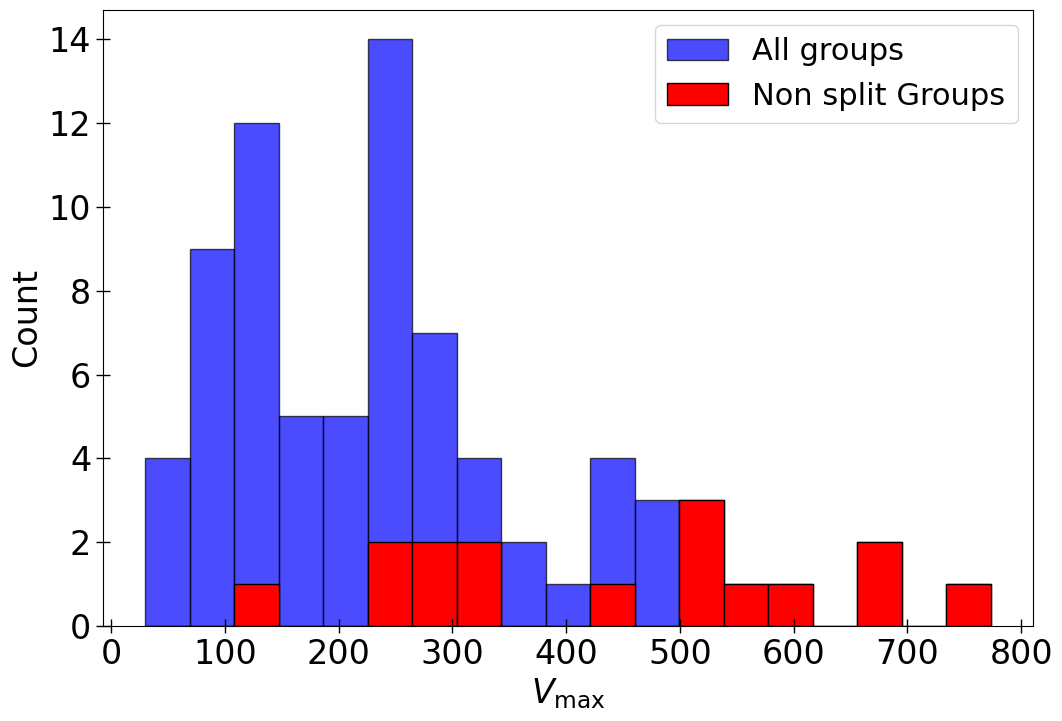

In [ ]:
def Group_agg(x):          

    z_mean = x['z'].mean()
    x['V'] = au.Velocity(x['z'],z_mean)
    V_moy = x['V'].mean()
    V_max = np.abs(x['V']-V_moy).max()
 

    values = [V_moy,V_max] 
    labels = ['V_moy', 'V_max']
 
        
    return pd.Series(values, index=labels) 
    
cols = sample['CG4_Gals'].columns
my_CG_Groups = sample['CG4_Gals'].groupby('Group')[cols].apply(Group_agg).reset_index()
my_CG_Gals_nosplit,trash = dl.remove_split_CG(sample['CG4_Gals'],sample['CG4_Groups'])
my_CG_Groups_nosplit = my_CG_Gals_nosplit.groupby('Group')[cols].apply(Group_agg).reset_index()
my_CG_Groups_split = my_CG_Groups[~my_CG_Groups['Group'].isin(my_CG_Groups_nosplit['Group'])]


data = {'Values': [my_CG_Groups['V_max'], my_CG_Groups_split['V_max']],
        'Labels': ['All groups', 'Non split Groups'], 
        'Colors': ['blue', 'red'], 
        'Alpha': [0.7, 1]}
        
gu.mult_hist(data, figname = 'CG_Vmax_histogram')

In [8]:

CG_gals, CG_groups = dl.remove_split_CG(sample['CG4_Gals'],sample['CG4_Groups'])

In [16]:
CG_groups[['Group', 'z_group', 'RA_BGG', 'Dec_BGG', 'ZS_type','lMass_200', 'M_virial', 'r_200_kpc',
           'size_Group_Bary_kpc', 'Vdisp']].to_csv(
                    'CG_groups_nonsplit_Florian.csv', index=False)

In [15]:
CG_groups.columns

Index(['Group', 'Lum_BGG', 'Lum_group', 'FracLumBGG', 'z_group', 'DeltaR12',
       'NbGal', 'RA_BGG', 'Dec_BGG', 'RA_Bary', 'Dec_Bary',
       'Radius_Bary_arcmin', 'Offset_Bary', 'V_BGG', 'V_moy', 'Vdisp',
       'Voffset', 'size_Group_Bary_kpc', 'M_group', 'M_virial',
       'M_virial_over_L', 't_cr', 'all_SFR', 'Prop_M_Sat', 'Prop_M_Tot',
       'Prop_G_Sat', 'Prop_G_Tot', 'Prop_Q_Sat', 'Prop_Q_Tot', 'Misfit_Bary',
       'Vmisfit', 'lMass_200', 'r_200_kpc', 'ZS_type'],
      dtype='object')